In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

In [2]:
Train_Data = pd.read_csv('fashion-mnist_train.csv')
Test_Data = pd.read_csv('fashion-mnist_test.csv')

display(Train_Data)
display(Test_Data)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


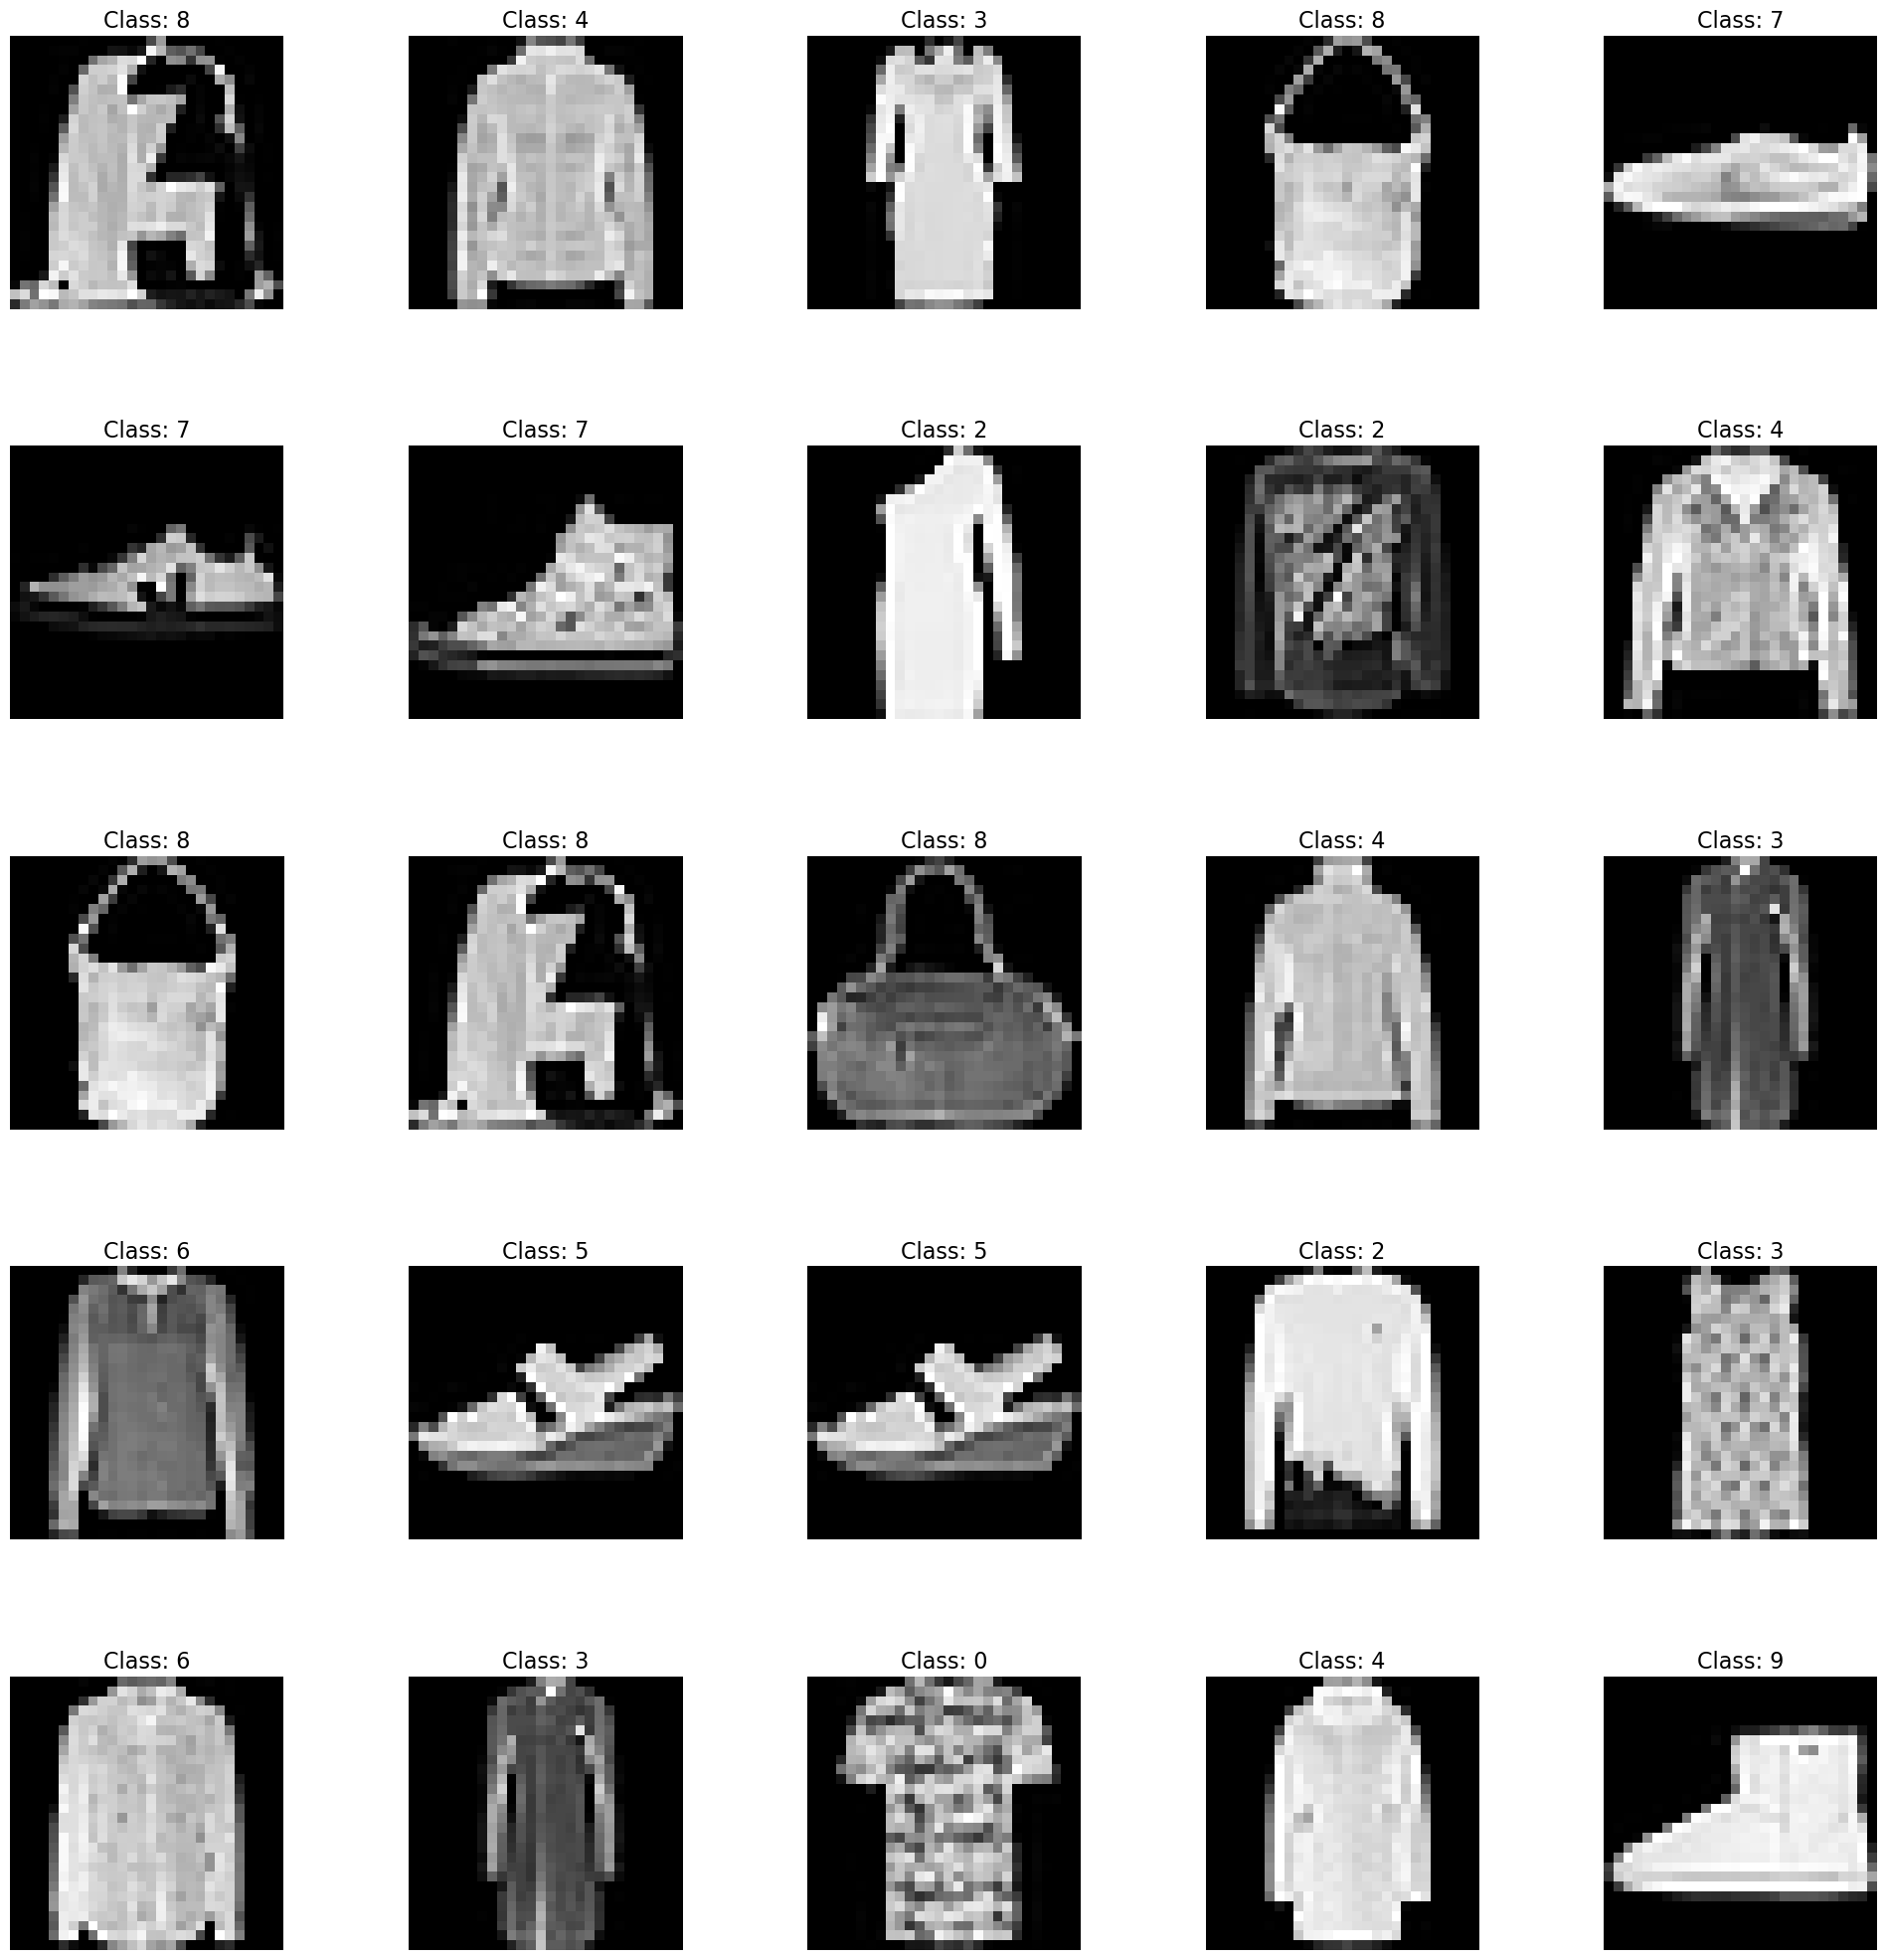

In [3]:
Train_image = Train_Data.values
Test_image = Test_Data.values

# Dimensions of the image grid.
grid_width = 25
grid_height = 25

fig, axes = plt.subplots(5, 5, figsize=(25, 25))
axes = axes.ravel()

for i in range(0,25):
    # Draft random index to get random image.
    index = np.random.randint(0, 60)
    axes[i].imshow(Train_image[index, 1:].reshape(28, 28), cmap='gray')
    # Show image class label above the drafted image.
    axes[i].set_title("Class: " + str(Train_image[index, 0]), fontsize=16)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)

In [4]:
X_train = Train_image[:, 1:] / 255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

y_train = Train_image[:, 0]
y_train = to_categorical(y_train, num_classes=10)

X_test = Test_image[:, 1:] / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_test = Test_image[:, 0]
y_test = to_categorical(y_test, num_classes=10)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers

# Layer 1

LeNet_5 = tf.keras.models.Sequential([
    layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding = 'valid'),
    layers.Conv2D(filters=16, strides=(1,1), kernel_size=(5,5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dense(120, activation='tanh'),
    layers.Flatten(),
    layers.Dense(units=84, activation='tanh'),
    layers.Dense(units=10, activation='softmax')
]) 


In [6]:
LeNet_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 4, 4, 120)         2040      
                                                                 
 flatten (Flatten)           (None, 1920)              0

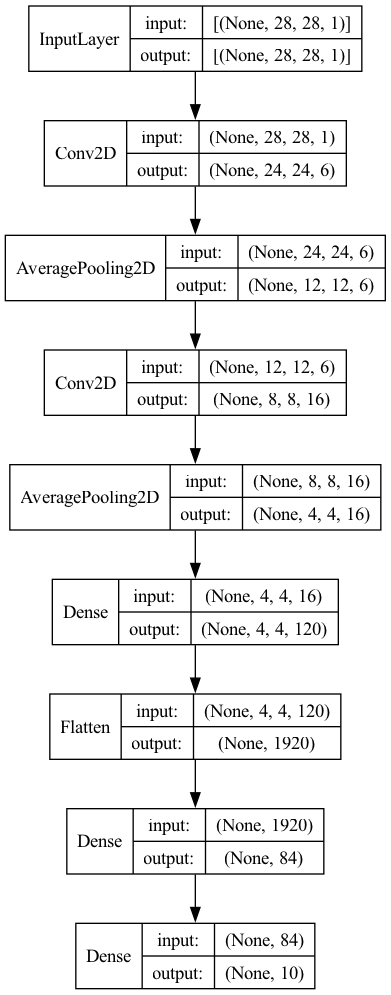

In [7]:
tf.keras.utils.plot_model(LeNet_5, to_file='model_LeNet5.png', show_shapes=True, show_layer_names=False)

In [8]:
LeNet_5.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.0, decay=0.0), loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = LeNet_5.fit(X_train,
                      y_train,
                      batch_size=128,
                      epochs=20,
                     verbose = 1,
                     validation_split=0.2)
     

Epoch 1/20
375/375 [==============================] - 11s 27ms/step - loss: 1.4243 - accuracy: 0.5546 - val_loss: 0.9455 - val_accuracy: 0.6765
Epoch 2/20
375/375 [==============================] - 10s 27ms/step - loss: 0.8332 - accuracy: 0.7096 - val_loss: 0.7761 - val_accuracy: 0.7252
Epoch 3/20
375/375 [==============================] - 11s 29ms/step - loss: 0.7238 - accuracy: 0.7367 - val_loss: 0.7114 - val_accuracy: 0.7380
Epoch 4/20
375/375 [==============================] - 11s 29ms/step - loss: 0.6708 - accuracy: 0.7517 - val_loss: 0.6690 - val_accuracy: 0.7533
Epoch 5/20
375/375 [==============================] - 10s 27ms/step - loss: 0.6356 - accuracy: 0.7632 - val_loss: 0.6420 - val_accuracy: 0.7623
Epoch 6/20
375/375 [==============================] - 11s 28ms/step - loss: 0.6092 - accuracy: 0.7732 - val_loss: 0.6203 - val_accuracy: 0.7746
Epoch 7/20
375/375 [==============================] - 10s 27ms/step - loss: 0.5879 - accuracy: 0.7824 - val_loss: 0.6011 - val_accuracy:

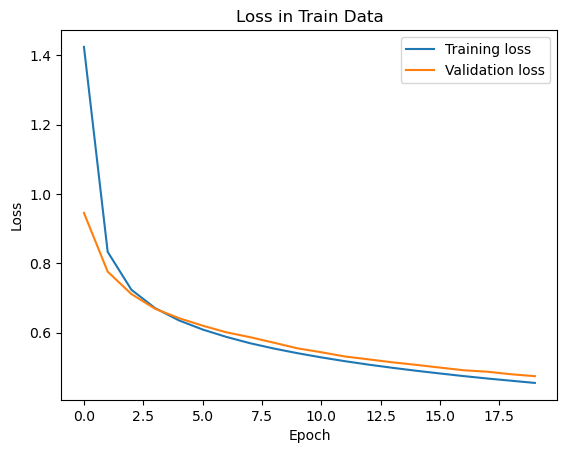

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss in Train Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

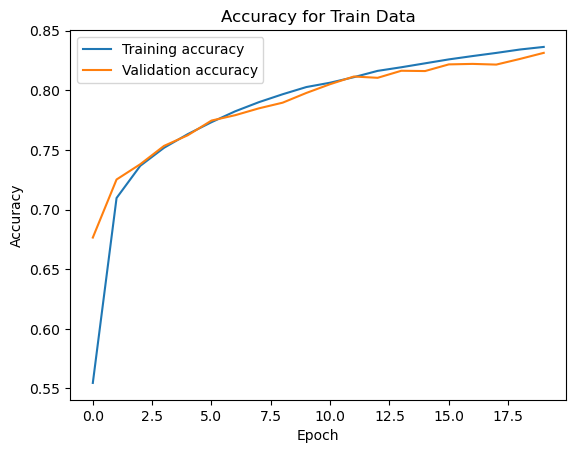

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy for Train Data")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

In [11]:
LeNet_5.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.4584 - accuracy: 0.8372


[0.4584343135356903, 0.8371999859809875]

In [12]:
X_train = Train_image[:, 1:] / 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
y_train = Train_image[:, 0]

X_test = Test_image[:, 1:] / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_test = Test_image[:, 0]



y_pred = LeNet_5.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)


class_names = ["0 -> T-shirt",
               "1 -> Trouser",
               "2 -> Pullover",
               "3 -> Dress",
               "4 -> Coat",
               "5 -> Sandal",
               "6 -> Shirt",
               "7 -> Sneaker",
               "8 -> Bag",
               "9 -> Ankle boot"]

print(classification_report(y_test, y_pred_classes, target_names=class_names))

313/313 [==============================] - 2s 7ms/step
                 precision    recall  f1-score   support

   0 -> T-shirt       0.75      0.83      0.79      1000
   1 -> Trouser       0.96      0.96      0.96      1000
  2 -> Pullover       0.72      0.71      0.72      1000
     3 -> Dress       0.85      0.86      0.86      1000
      4 -> Coat       0.72      0.82      0.77      1000
    5 -> Sandal       0.93      0.93      0.93      1000
     6 -> Shirt       0.63      0.48      0.54      1000
   7 -> Sneaker       0.92      0.89      0.90      1000
       8 -> Bag       0.96      0.95      0.95      1000
9 -> Ankle boot       0.92      0.94      0.93      1000

       accuracy                           0.84     10000
      macro avg       0.83      0.84      0.83     10000
   weighted avg       0.83      0.84      0.83     10000



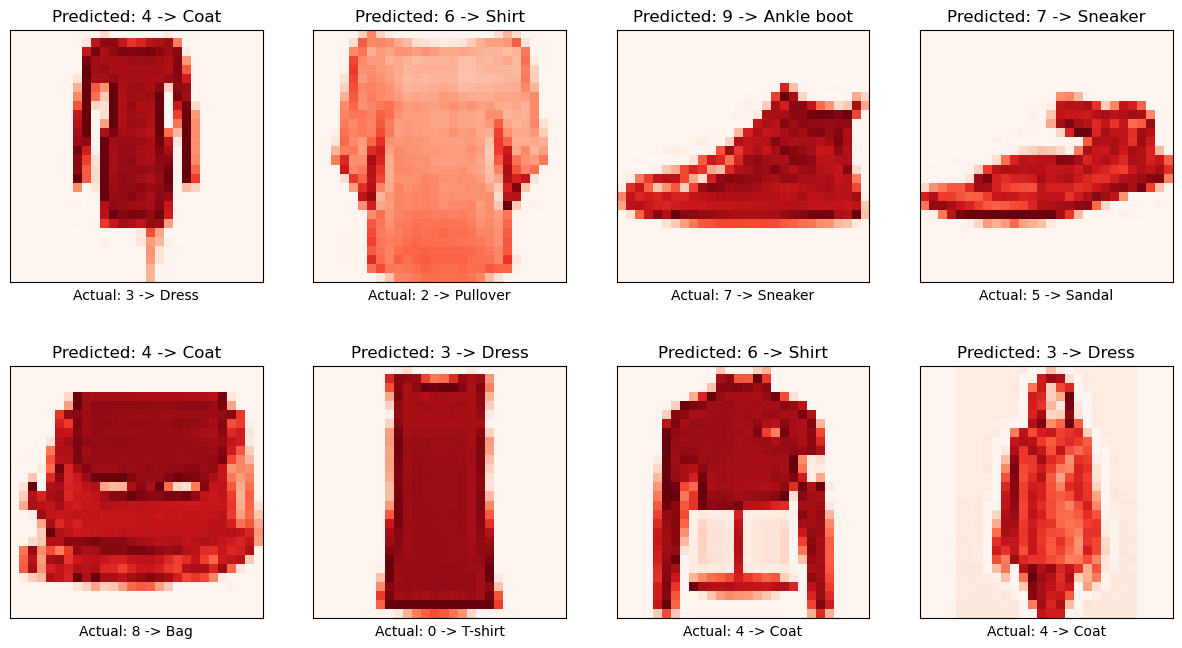

In [13]:
incorrect = np.nonzero(y_pred_classes!=y_test)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[y_pred_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))